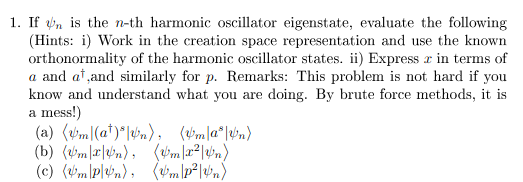

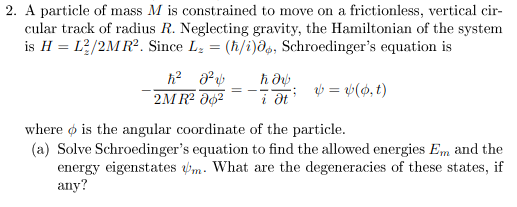

In [2]:
from IPython.display import Image
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import os
import glob
import shutil
import matplotlib.style as style
import pandas as pd
from fractions import Fraction
import seaborn as sns


style.use('dark_background')
plt.rcParams['text.usetex'] = False



#display screenshots
for i in range(1, 3):
    display(Image(filename=f'p_statement/p{i}.png'))

#file moving for housekeeping
def move_plots():
    output_dir = 'graphs'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    #all gif and png
    files_to_move = glob.glob('*.png') + glob.glob('*.gif')

    for file in files_to_move:
        destination = os.path.join(output_dir, file)

        #if exists, replace
        if os.path.exists(destination):
            os.remove(destination)

        #move it
        shutil.move(file, destination)
        print(f'Moved {file} to {output_dir}')

        

In [3]:
def display_formatted(description, value):
    sp.pprint(description)
    display(value)


##############
#problem 1

#def quantum num and const
n, m, s = sp.symbols('n m s', integer=True, nonnegative=True)
hbar, M, omega = sp.symbols('hbar M omega', real=True, positive=True)

#ladder and matrix elements with kdelta
a_dagger_s = sp.sqrt(sp.factorial(n + s) / sp.factorial(n)) * sp.KroneckerDelta(m, n + s)
a_s = sp.sqrt(sp.factorial(n) / sp.factorial(n - s)) * sp.KroneckerDelta(m, n - s)

#position and momentum op
x_coeff = sp.sqrt(hbar / (2 * M * omega))
p_coeff = sp.I * sp.sqrt(hbar * M * omega / 2)
#matrix element for x and p
x_matrix_element = x_coeff * (sp.sqrt(n) * sp.KroneckerDelta(m, n - 1) + sp.sqrt(n + 1) * sp.KroneckerDelta(m, n + 1))
p_matrix_element = p_coeff * (sp.sqrt(n + 1) * sp.KroneckerDelta(m, n + 1) - sp.sqrt(n) * sp.KroneckerDelta(m, n - 1))
# Compute x^2 and p^2
x2_matrix_element = x_coeff**2 * (
    sp.sqrt(n * (n - 1)) * sp.KroneckerDelta(m, n - 2) +
    (2 * n + 1) * sp.KroneckerDelta(m, n) +
    sp.sqrt((n + 1) * (n + 2)) * sp.KroneckerDelta(m, n + 2)
)

p2_matrix_element = (hbar * M * omega / 2) * (
    (2 * n + 1) * sp.KroneckerDelta(m, n) - 
    sp.sqrt(n * (n - 1)) * sp.KroneckerDelta(m, n - 2) - 
    sp.sqrt((n + 1) * (n + 2)) * sp.KroneckerDelta(m, n + 2)
)

In [4]:

#call display funct:
results = {
    'x_coeff': x_coeff,
    'p_coeff': p_coeff,
    'a_dagger_s': a_dagger_s,
    'a_s': a_s,
    'x_matrix_element': x_matrix_element,
    'p_matrix_element': p_matrix_element,
    'p2_matrix_element': p2_matrix_element,
    'x2_matrix_element': x2_matrix_element
}

#call for each
for key, value in results.items():
    description = f'The {key.replace("_", " ")} is:\n'
    display_formatted(description, value)


The x coeff is:


sqrt(2)*sqrt(hbar)/(2*sqrt(M)*sqrt(omega))

The p coeff is:


sqrt(2)*I*sqrt(M)*sqrt(hbar)*sqrt(omega)/2

The a dagger s is:


KroneckerDelta(m, n + s)*sqrt(factorial(n + s))/sqrt(factorial(n))

The a s is:


sqrt(1/factorial(n - s))*KroneckerDelta(m, n - s)*sqrt(factorial(n))

The x matrix element is:


sqrt(2)*sqrt(hbar)*(sqrt(n)*KroneckerDelta(m, n - 1) + sqrt(n + 1)*KroneckerDelta(m, n + 1))/(2*sqrt(M)*sqrt(omega))

The p matrix element is:


sqrt(2)*I*sqrt(M)*sqrt(hbar)*sqrt(omega)*(-sqrt(n)*KroneckerDelta(m, n - 1) + sqrt(n + 1)*KroneckerDelta(m, n + 1))/2

The p2 matrix element is:


M*hbar*omega*(-sqrt(n)*sqrt(n - 1)*KroneckerDelta(m, n - 2) - sqrt(n + 1)*sqrt(n + 2)*KroneckerDelta(m, n + 2) + (2*n + 1)*KroneckerDelta(m, n))/2

The x2 matrix element is:


hbar*(sqrt(n)*sqrt(n - 1)*KroneckerDelta(m, n - 2) + sqrt(n + 1)*sqrt(n + 2)*KroneckerDelta(m, n + 2) + (2*n + 1)*KroneckerDelta(m, n))/(2*M*omega)

In [5]:

def solve_particle_on_ring():
    #sym
    m = sp.Symbol('m', integer=True)
    phi = sp.Symbol('phi', real=True)
    E = sp.Symbol('E')
    M, R, hbar = sp.symbols('M R hbar', positive=True)
    
    #i solved ode by hand: -hbar²/(2MR²) * diff(psi, phi, 2) = E * psi
    psi = sp.Function('psi')(phi)
    ode = sp.Eq(-hbar**2/(2*M*R**2) * psi.diff(phi, 2), E * psi)
    
    #sympy solve ode general
    solution = sp.dsolve(ode)
    display_formatted('General Solution to the ODE:', solution)
    
    #know we are bound in circle, periodic boundry condition
    k = sp.Symbol('k')
    bc_eq = sp.exp(2*sp.pi*sp.I*k) - 1
    k_values = sp.solve(bc_eq, k)
    display_formatted('Allowed k values (solving e^{2πik} = 1):', k_values)
    
    #we also stated k must be integer --> replace k with m (m is in set z)
    psi_m = sp.exp(sp.I * m * phi) / sp.sqrt(2*sp.pi)
    E_m = (hbar**2 * m**2) / (2 * M * R**2)
    
    #display efunct,evals
    display_formatted('Normalized Eigenfunction ψ_m(φ):', psi_m)
    display_formatted('Energy Eigenvalues E_m:', E_m)
    
    # Degeneracy analysis
    display_formatted('Degeneracy:',
        "E_0 is non-degenerate\n"
        "E_m (m ≠ 0) are 2-fold degenerate (m and -m)"
    )
    
    #some other stuff i found (momentum and density)
    L_z_psi = hbar * m * psi_m
    display_formatted('Angular Momentum Action L_z ψ_m(φ):', L_z_psi)
    
    prob_density = sp.Abs(psi_m)**2
    display_formatted('Probability Density |ψ_m(φ)|²:', prob_density.simplify())

#call function
solve_particle_on_ring()
#sym
hbar, m, M, R = sp.symbols('hbar m M R', real=True, positive=True)
theta = sp.symbols('theta', real=True)

#moment of interia sub
I = M * R**2

#wavefunction psi_m(theta)
psi_m = 1 / sp.sqrt(2 * sp.pi) * sp.exp(sp.I * m * theta)

#energy expression E_m
E_m = (hbar**2 * m**2) / (2 * I)

# Evaluate energies E0 through E5 and determine degeneracies
degeneracies = {}
energy_values = []
for mi in range(5):
    Ei = E_m.subs(m, mi)
    if mi == 0:
        degeneracies[Ei] = 1  #non degen when zero
    else:
        degeneracies[Ei] = 2  #2fold when abs(m)>0
    energy_values.append((mi, Ei, degeneracies[Ei]))

#display in df
df = pd.DataFrame(energy_values, columns=['m', 'E_m', 'Degeneracy'])
display(df)

#show
display_formatted('psi_m is:',psi_m)
display_formatted('E_m is: ',E_m)


General Solution to the ODE:


Eq(psi(phi), C1*exp(-sqrt(2)*sqrt(M)*R*phi*sqrt(-E)/hbar) + C2*exp(sqrt(2)*sqrt(M)*R*phi*sqrt(-E)/hbar))

Allowed k values (solving e^{2πik} = 1):


[0, 1]

Normalized Eigenfunction ψ_m(φ):


sqrt(2)*exp(I*m*phi)/(2*sqrt(pi))

Energy Eigenvalues E_m:


hbar**2*m**2/(2*M*R**2)

Degeneracy:


'E_0 is non-degenerate\nE_m (m ≠ 0) are 2-fold degenerate (m and -m)'

Angular Momentum Action L_z ψ_m(φ):


sqrt(2)*hbar*m*exp(I*m*phi)/(2*sqrt(pi))

Probability Density |ψ_m(φ)|²:


1/(2*pi)

,m,E_m,Degeneracy
0,0,0,1
1,1,hbar**2/(2*M*R**2),2
2,2,2*hbar**2/(M*R**2),2
3,3,9*hbar**2/(2*M*R**2),2
4,4,8*hbar**2/(M*R**2),2


psi_m is:


sqrt(2)*exp(I*m*theta)/(2*sqrt(pi))

E_m is: 


hbar**2*m**2/(2*M*R**2)

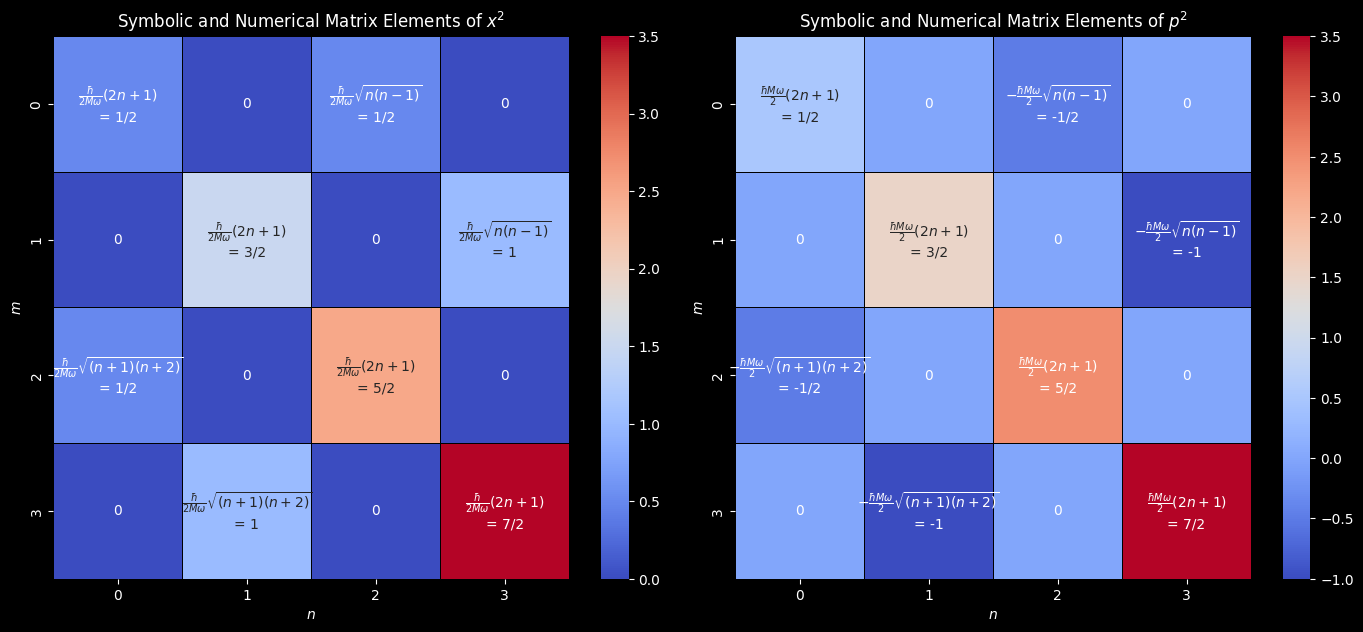

Moved Matrix_Elements_pr_2.png to graphs


In [6]:
##pr2 lets look at matrix
#arbitrary
hbar = 1.0
M = 1.0
omega = 1.0

#input size, small for formatting
matrix_size = 4
n_values = np.arange(0, matrix_size)

#symbolic and numerical matrix elements for x^2 and p^2
def x2_symbolic(m, n):
    if m == n:
        return r"$\frac{\hbar}{2M\omega}(2n+1)$"
    elif m == n + 2:
        return r"$\frac{\hbar}{2M\omega}\sqrt{(n+1)(n+2)}$"
    elif m == n - 2:
        return r"$\frac{\hbar}{2M\omega}\sqrt{n(n-1)}$"
    else:
        return "0"

def p2_symbolic(m, n):
    if m == n:
        return r"$\frac{\hbar M\omega}{2}(2n+1)$"
    elif m == n + 2:
        return r"$-\frac{\hbar M\omega}{2}\sqrt{(n+1)(n+2)}$"
    elif m == n - 2:
        return r"$-\frac{\hbar M\omega}{2}\sqrt{n(n-1)}$"
    else:
        return "0"

def x2_numerical(m, n):
    if m == n:
        return Fraction(int(2 * n + 1), 2)
    elif m == n + 2:
        return Fraction(int(np.sqrt((n + 1) * (n + 2))), 2)
    elif m == n - 2:
        return Fraction(int(np.sqrt(n * (n - 1))), 2)
    else:
        return 0

def p2_numerical(m, n):
    if m == n:
        return Fraction(int(2 * n + 1), 2)
    elif m == n + 2:
        return Fraction(int(-np.sqrt((n + 1) * (n + 2))), 2)
    elif m == n - 2:
        return Fraction(int(-np.sqrt(n * (n - 1))), 2)
    else:
        return 0

#sym and num matrices for x**2 and p**2
x2_symbolic_matrix = np.empty((matrix_size, matrix_size), dtype=object)
p2_symbolic_matrix = np.empty((matrix_size, matrix_size), dtype=object)
x2_numerical_matrix = np.empty((matrix_size, matrix_size), dtype=object)
p2_numerical_matrix = np.empty((matrix_size, matrix_size), dtype=object)

for m in n_values:
    for n in n_values:
        x2_symbolic_matrix[m, n] = x2_symbolic(m, n)
        p2_symbolic_matrix[m, n] = p2_symbolic(m, n)
        x2_numerical_matrix[m, n] = x2_numerical(m, n)
        p2_numerical_matrix[m, n] = p2_numerical(m, n)

#combine annotation
def combine_annotations(symbolic, numerical):
    if numerical == 0:
        return "0"
    else:
        return f"{symbolic}\n= {numerical}"

x2_annotations = np.empty_like(x2_symbolic_matrix, dtype=object)
p2_annotations = np.empty_like(p2_symbolic_matrix, dtype=object)

for m in n_values:
    for n in n_values:
        x2_annotations[m, n] = combine_annotations(x2_symbolic_matrix[m, n], x2_numerical_matrix[m, n])
        p2_annotations[m, n] = combine_annotations(p2_symbolic_matrix[m, n], p2_numerical_matrix[m, n])

#heatmap of matriciess
plt.figure(figsize=(14, 12))

plt.subplot(2, 2, 1)
sns.heatmap(
    [[float(x2_numerical_matrix[m, n]) for n in n_values] for m in n_values],
    annot=x2_annotations, fmt="", cmap="coolwarm", cbar=True,
    xticklabels=n_values, yticklabels=n_values, linewidths=0.5, linecolor="black"
)
plt.title(r'Symbolic and Numerical Matrix Elements of $x^2$')
plt.xlabel(r'$n$')
plt.ylabel(r'$m$')


plt.subplot(2, 2, 2)
sns.heatmap(
    [[float(p2_numerical_matrix[m, n]) for n in n_values] for m in n_values],
    annot=p2_annotations, fmt="", cmap="coolwarm", cbar=True,
    xticklabels=n_values, yticklabels=n_values, linewidths=0.5, linecolor="black"
)
plt.title(r'Symbolic and Numerical Matrix Elements of $p^2$')
plt.xlabel(r'$n$')
plt.ylabel(r'$m$')


#display and save
plt.tight_layout()
plt.savefig('Matrix_Elements_pr_2.png',dpi=600)
plt.show()
move_plots()
